<a href="https://colab.research.google.com/github/iamsauravsharma/insincere-question-classification/blob/bishal/preprocess%20and%20data%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"bishalgaire360","key":"69b39489849cd899eaa93339bad30cdb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c quora-insincere-questions-classification
from zipfile import ZipFile
file_name="train.csv.zip"
#file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')
file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
df=pd.read_csv('train.csv')
from tqdm import tqdm_notebook
import numpy as np
emb_file = "glove.840B.300d/glove.840B.300d.txt"
#emb_file ="GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
glove_dic = {}
for line in tqdm_notebook(open(emb_file)):
    temp = line.split(" ")
    glove_dic[temp[0]] = np.asarray(temp[1:],dtype='float32')

del df['qid']



train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
embeddings.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Done
Done


In [3]:
def clean_text(x):

    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()+-/:;<=>@[\\]^_`{|}~' + '“”’':
    #for punct in '?':
        x = x.replace(punct, '')
    return x
df["question_text"] = df["question_text"].progress_apply(lambda x: clean_text(x))

100%|██████████| 1306122/1306122 [00:12<00:00, 102676.61it/s]


In [0]:
import re
def clean_misspell(text):
    """
    misspell list (quora vs. glove)
    """
    misspell_to_sub = {
        '(T|t)erroristan': 'terrorist Pakistan',
        'BIMARU': 'Bihar, Madhya Pradesh, Rajasthan, Uttar Pradesh',
        '(H|h)induphobic': 'Hindu phobic',
        '(H|h)induphobia': 'Hindu phobic',
        'Babchenko': 'Arkady Arkadyevich Babchenko faked death',
        'Boshniaks': 'Bosniaks',
        'Dravidanadu': 'Dravida Nadu',
        'mysoginists': 'misogynists',
        'MGTOWS': 'Men Going Their Own Way',
        'mongloid': 'Mongoloid',
        'unsincere': 'insincere',
        'meninism': 'male feminism',
        'jewplicate': 'jewish replicate',
        'unoin': 'Union',
        'daesh': 'Islamic State of Iraq and the Levant',
        'Kalergi': 'Coudenhove-Kalergi',
        ' apist': ' Ape',
        '(B|b)hakts': 'Bhakt',
        'Tambrahms': 'Tamil Brahmin',
        'Pahul': 'Amrit Sanskar',
        'SJW(s|)': 'social justice warrior',
        'incel(s|)': 'involuntary celibates',
        'emiratis': 'Emiratis',
        'weatern': 'western',
        'Pizzagate': 'Pizzagate conspiracy theory',
        'naïve': 'naive',
        'Skripal': 'Sergei Skripal',
        '(R|r)emainers': 'remainer',
        'antibrahmin': 'anti Brahminism',
        'HYPSM': ' Harvard, Yale, Princeton, Stanford, MIT',
        'HYPS': ' Harvard, Yale, Princeton, Stanford',
        'kompromat': 'compromising material',
        '(T|t)harki': 'pervert',
        'mastuburate': 'masturbate',
        'Zoë': 'Zoe',
        'indans': 'Indian',
        'xender': 'gender',
        'Naxali': 'Naxalite',
        'Bathla': 'Namit Bathla',
        'Mewani': 'Indian politician Jignesh Mevani',
        'clichéd': 'cliché',
        'cliché(s|)': 'cliché',
        'Wjy': 'Why',
        'Fadnavis': 'Indian politician Devendra Fadnavis',
        'Awadesh': 'Indian engineer Awdhesh Singh',
        'Awdhesh': 'Indian engineer Awdhesh Singh',
        'Khalistanis': 'Sikh separatist movement',
        'madheshi': 'Madheshi',
        'Quorans': 'Quoran',
        'BNBR': 'Be Nice, Be Respectful',
        'Bolsonaro': 'Jair Bolsonaro',
        'XXXTentacion': 'Tentacion',
        'Padmavat': 'Indian Movie Padmaavat',
        'Žižek': 'Slovenian philosopher Slavoj Žižek',
        'Adityanath': 'Indian monk Yogi Adityanath',
        '(B|b)rexit': 'British Exit',
        'jallikattu': 'Jallikattu',
        'fortnite': 'Fortnite',
        'Swachh': 'Swachh Bharat mission campaign',
        'Qoura': 'Quora',
        'narcissit': 'narcissist',
        # extra in sample
        'Doklam': 'Tibet',
        'Drumpf': 'Donald Trump',
        'Strzok': 'Hillary Clinton scandal',
        'rohingya': 'Rohingya',
        'wumao': 'offensive Chinese',
        'Sanghis': 'Sanghi',
        'Tamilans': 'Tamils',
        'biharis': 'Biharis',
        'Rejuvalex': 'hair growth formula',
        'Feku': 'The Man of India',
        'deplorables': 'deplorable',
        'muhajirs': 'Muslim immigrants',
        'Brexiters': 'British Exit supporters',
        'Brexiteers': 'British Exit supporters',
        'Brexiting': 'British Exit',
        'Gujratis': 'Gujarati',
        'Chutiya': 'Tibet people',
        'thighing': 'masturbate',
        '卐': 'Nazi Germany',
        'rohingyas': 'Muslim ethnic group',
        'Pribumi': 'Native Indonesians',
        'Gurmehar': 'Gurmehar Kaur Indian student activist',
        'Novichok': 'Soviet Union agents',
        'Khazari': 'Khazars',
        'Demonetization': 'demonetization',
        'demonetisation': 'demonetization',
        'cryptocurrencies': 'bitcoin',
        'Hindians': 'offensive Indian',
        'vaxxers': 'vocal nationalists',
        'remoaners': 'remainer',
        'Jewism': 'Judaism',
        'Eroupian': 'European',
        'WMAF': 'White male Asian female',
        'moeslim': 'Muslim',
        'cishet': 'cisgender and heterosexual person',
        'Eurocentrics': 'Eurocentrism',
        'Jewdar': 'Jew dar',
        'Asifas': 'abduction, rape, murder case',
        'marathis': 'Marathi',
        'Trumpanzees': 'Trump chimpanzee',
        'quoras': 'Quora',
        'Crimeans': 'Crimea people',
        'atrracted': 'attract',
        'LGBT': 'lesbian, gay, bisexual, transgender',
        'Boshniaks': 'Bosniaks',
        'Myeshia': 'widow of Green Beret killed in Niger',
        'demcoratic': 'Democratic',
        'raaping': 'rape',
        'Dönmeh': 'Islam',
        'feminazism': 'feminism nazi',
        'Quroa': 'Quora',
        'QUORA': 'Quora',
        'langague': 'language',
        '(H|h)ongkongese': 'HongKong people',
        '(K|k)ashmirians': 'Kashmirian',
        '(C|c)hodu': 'fucker',
        'penish': 'penis',
        'micropenis': 'small penis',
        'Madridiots': 'Madrid idiot',
        'Ambedkarites': 'Dalit Buddhist movement',
        'ReleaseTheMemo': 'cry for the right and Trump supporters',
        'harrase': 'harass',
        '(B|b)arracoon': 'Black slave',
        '(C|c)astrater': 'castration',
        '(R|r)apistan': 'rapist Pakistan',
        '(T|t)urkified': 'Turkification',
        'Dumbassistan': 'dumb ass Pakistan',
        'facetards': 'Facebook retards',
        'rapefugees': 'rapist refugee',
        'superficious': 'superficial',
        # extra from kagglers
        'colour': 'color',
        'centre': 'center',
        'favourite': 'favorite',
        'travelling': 'traveling',
        'counselling': 'counseling',
        'theatre': 'theater',
        'cancelled': 'canceled',
        'labour': 'labor',
        'organisation': 'organization',
        'wwii': 'world war 2',
        'citicise': 'criticize',
        'youtu ': 'youtube ',
        'Qoura': 'Quora',
        'sallary': 'salary',
        'Whta': 'What',
        'narcisist': 'narcissist',
        'narcissit': 'narcissist',
        'howdo': 'how do',
        'whatare': 'what are',
        'howcan': 'how can',
        'howmuch': 'how much',
        'howmany': 'how many',
        'whydo': 'why do',
        'doI': 'do I',
        'theBest': 'the best',
        'howdoes': 'how does',
        'mastrubation': 'masturbation',
        'mastrubate': 'masturbate',
        'mastrubating': 'masturbating',
        'pennis': 'penis',
        'Etherium': 'Ethereum',
        'bigdata': 'big data',
        '2k17': '2017',
        '2k18': '2018',
        'qouta': 'quota',
        'exboyfriend': 'ex boyfriend',
        'airhostess': 'air hostess',
        'whst': 'what',
        'watsapp': 'whatsapp',
        'demonitisation': 'demonetization',
        'demonitization': 'demonetization',
        'demonetisation': 'demonetization'
    }
    misspell_re = re.compile('(%s)' % '|'.join(misspell_to_sub.keys()))

    def _replace(match):
        
        """
        reference: https://www.kaggle.com/hengzheng/attention-capsule-why-not-both-lb-0-694 # noqa
        """
        return misspell_to_sub.get(match.group(0), match.group(0))
    return misspell_re.sub(_replace, text)


In [0]:
import string
def spacing_misspell(text):
    """
    'deadbody' -> 'dead body'
    """
    misspell_list = [
        'body',
        '(D|d)ead',
        '(N|n)orth',
        '(K|k)orea',
        'matrix',
        '(S|s)hit',
        '(F|f)uck',
        '(F|f)uk',
        '(F|f)ck',
        '(D|d)ick',
        'Trump',
        '\W(A|a)nti',
        '(W|w)hy',
        # 'Jew',
        'bait',
        'care',
        'troll',
        'over',
        'gender',
        'people',
        'kind',
        '(S|s)ick',
        '(S|s)uck',
        '(I|i)diot',
        # 'hole(s|)\W',
        '(B|b)ooty',
        '(C|c)oin(s|)\W',
        '\W(N|n)igger'
    ]
    misspell_re = re.compile('(%s)' % '|'.join(misspell_list))
    return misspell_re.sub(r" \1 ", text)


def clean_latex(text):
    """
    convert r"[math]\vec{x} + \vec{y}" to English
    """
    # edge case
    text = re.sub(r'\[math\]', ' LaTex math ', text)
    text = re.sub(r'\[\/math\]', ' LaTex math ', text)
    text = re.sub(r'\\', ' LaTex ', text)

    pattern_to_sub = {
        r'\\mathrm': ' LaTex math mode ',
        r'\\mathbb': ' LaTex math mode ',
        r'\\boxed': ' LaTex equation ',
        r'\\begin': ' LaTex equation ',
        r'\\end': ' LaTex equation ',
        r'\\left': ' LaTex equation ',
        r'\\right': ' LaTex equation ',
        r'\\(over|under)brace': ' LaTex equation ',
        r'\\text': ' LaTex equation ',
        r'\\vec': ' vector ',
        r'\\var': ' variable ',
        r'\\theta': ' theta ',
        r'\\mu': ' average ',
        r'\\min': ' minimum ',
        r'\\max': ' maximum ',
        r'\\sum': ' + ',
        r'\\times': ' * ',
        r'\\cdot': ' * ',
        r'\\hat': ' ^ ',
        r'\\frac': ' / ',
        r'\\div': ' / ',
        r'\\sin': ' Sine ',
        r'\\cos': ' Cosine ',
        r'\\tan': ' Tangent ',
        r'\\infty': ' infinity ',
        r'\\int': ' integer ',
        r'\\in': ' in ',
    }
    # post process for look up
    pattern_dict = {k.strip('\\'): v for k, v in pattern_to_sub.items()}
    # init re
    patterns = pattern_to_sub.keys()
    pattern_re = re.compile('(%s)' % '|'.join(patterns))

    def _replace(match):
        """
        reference: https://www.kaggle.com/hengzheng/attention-capsule-why-not-both-lb-0-694 # noqa
        """
        return pattern_dict.get(match.group(0).strip('\\'), match.group(0))
    return pattern_re.sub(_replace, text)


def normalize_unicode(text):
    """
    unicode string normalization
    """
    return unicodedata.normalize('NFKD', text)


def remove_newline(text):
    """
    remove \n and  \t
    """
    text = re.sub('\n', ' ', text)
    text = re.sub('\t', ' ', text)
    text = re.sub('\b', ' ', text)
    text = re.sub('\r', ' ', text)
    return text


def decontracted(text):
    """
    de-contract the contraction
    """
    # specific
    text = re.sub(r"(W|w)on(\'|\’)t", "will not", text)
    text = re.sub(r"(C|c)an(\'|\’)t", "can not", text)
    text = re.sub(r"(Y|y)(\'|\’)all", "you all", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll", "you all", text)

    # general
    text = re.sub(r"(I|i)(\'|\’)m", "i am", text)
    text = re.sub(r"(A|a)in(\'|\’)t", "is not", text)
    text = re.sub(r"n(\'|\’)t", " not", text)
    text = re.sub(r"(\'|\’)re", " are", text)
    text = re.sub(r"(\'|\’)s", " is", text)
    text = re.sub(r"(\'|\’)d", " would", text)
    text = re.sub(r"(\'|\’)ll", " will", text)
    text = re.sub(r"(\'|\’)t", " not", text)
    text = re.sub(r"(\'|\’)ve", " have", text)
    return text


def spacing_punctuation(text):
    """
    add space before and after punctuation and symbols
    """
    regular_punct = list(string.punctuation)
    extra_punct = [
        ',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&',
        '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
        '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
        '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
        '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
        '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
        '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
        'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
        '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
        '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
    all_punct = ''.join(sorted(list(set(regular_punct + extra_punct))))
    re_tok = re.compile(f'([{all_punct}])')
    return re_tok.sub(r' \1 ', text)


def spacing_digit(text):
    """
    add space before and after digits
    """
    re_tok = re.compile('([0-9])')
    return re_tok.sub(r' \1 ', text)


def spacing_number(text):
    """
    add space before and after numbers
    """
    re_tok = re.compile('([0-9]{1,})')
    return re_tok.sub(r' \1 ', text)


def remove_number(text):
    """
    numbers are not toxic
    """
    return re.sub('\d+', ' ', text)


def remove_space(text):
    """
    remove extra spaces and ending space if any
    """
    text = re.sub('\s+', ' ', text)
    text = re.sub('\s+$', '', text)
    return text


"""
tokenizer
"""


def preprocess(text, remove_num=True):
    """
    preprocess text into clean text for tokenization
    NOTE:
        1. glove supports uppper case words
        2. glove supports digit
        3. glove supports punctuation
        5. glove supports domains e.g. www.apple.com
        6. glove supports misspelled words e.g. FUCKKK
    """
    # # 1. normalize
    # text = normalize_unicode(text)
    # # 2. remove new line
    # text = remove_newline(text)
    # 3. de-contract
    text = decontracted(text)
    # 4. clean misspell
    text = clean_misspell(text)
    # 5. space misspell
    #text = spacing_misspell(text)
    # 6. clean_latex
    text = clean_latex(text)
    # 7. space
    text = spacing_punctuation(text)
    # 8. handle number
    if remove_num:
        text = remove_number(text)
    else:
        text = spacing_digit(text)
    # 9. remove space
    text = remove_space(text)
    return text

In [6]:
df["question_text"] = df["question_text"].progress_apply(preprocess)

100%|██████████| 1306122/1306122 [04:40<00:00, 4662.54it/s]


In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1, random_state=42)
n_words = 80000
tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(list(train.question_text))

q_train = tokenizer.texts_to_sequences(train.question_text)
q_val = tokenizer.texts_to_sequences(val.question_text)
#q_test = tokenizer.texts_to_sequences(df_test.question_text)

max_len = 65
q_train = pad_sequences(q_train,maxlen=max_len)
q_val = pad_sequences(q_val,maxlen=max_len)
#q_test = pad_sequences(q_test,maxlen=max_len)

y_train = train.target
y_val = val.target

del train,val
word_index = tokenizer.word_index
emb_size = glove_dic['.'].shape[0]
emb_matrix = np.zeros((n_words,emb_size))
for w,index in word_index.items():
    if index >= n_words:
        continue
    vec = glove_dic.get(w)
    if vec is not None:
        emb_matrix[index,:] = vec



Using TensorFlow backend.


In [0]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#find the best threshold
def optim_thres(y_val,y_pred):
    score = 0
    thresholds = np.arange(0.1,0.501,0.01)
    for thres in thresholds:
        thres = np.round(thres,2)
        temp_pred = (y_pred > thres).astype(int)
        temp_score = f1_score(y_val,temp_pred)
        print("Thres: {} --------- F1: {}".format(thres,temp_score))
        if temp_score > score:
            score = temp_score
            final_thres = thres
    return final_thres

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import gensim as gn
from tqdm import tqdm_notebook

from keras.layers import LSTM,Bidirectional,TimeDistributed, Embedding,Dense,Input,GlobalMaxPool1D,Flatten,Dropout
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Sequential,Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.optimizers import Adam,Adamax
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True
        
    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)
    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim

In [0]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import LSTM,Bidirectional,TimeDistributed, Embedding,Dense,Input,GlobalMaxPool1D,Flatten,Dropout,Conv1D
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,Flatten,Dense
from keras.optimizers import Adam,Adamax
from keras.engine.topology import Layer
from keras.layers.normalization import BatchNormalization


In [10]:
inp = Input(shape=(max_len,))
x = Embedding(input_dim=n_words,output_dim=emb_size, weights=[emb_matrix])(inp)
#x = Embedding(input_dim=n_words,output_dim=embed_size, weights=[embedding_matrix])(inp)
#x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x =  Bidirectional(CuDNNGRU(100,return_sequences=True))(x)
x = Attention(step_dim=max_len)(x)
x = Dense(36,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp,output=x)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 65)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 65, 300)           24000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 65, 200)           321600    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 65, 200)           181200    
_________________________________________________________________
attention_1 (Attention)      (None, 200)               265       
_________________________________________________________________
dense_1 (Dense)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [13]:
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)

adamax= Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['acc',f1])
history  = model.fit(q_train,y_train,batch_size=1500,epochs=7,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/7
1175509/1175509 [==============================] - 160s 136us/step - loss: 0.1221 - acc: 0.9524 - f1: 0.5467 - val_loss: 0.1103 - val_acc: 0.9551 - val_f1: 0.6532

Epoch 00001: val_f1 improved from -inf to 0.65317, saving model to ./lstm_glove_emb.hdf5
Epoch 2/7
1175509/1175509 [==============================] - 163s 139us/step - loss: 0.1023 - acc: 0.9591 - f1: 0.6375 - val_loss: 0.0994 - val_acc: 0.9602 - val_f1: 0.6579

Epoch 00002: val_f1 improved from 0.65317 to 0.65790, saving model to ./lstm_glove_emb.hdf5
Epoch 3/7
1175509/1175509 [==============================] - 165s 141us/step - loss: 0.0960 - acc: 0.9614 - f1: 0.6660 - val_loss: 0.0975 - val_acc: 0.9611 - val_f1: 0.6530

Epoch 00003: val_f1 did not improve from 0.65790
Epoch 4/7
1175509/1175509 [==============================] - 165s 141us/step - loss: 0.0909 - acc: 0.9632 - f1: 0.6869 - val_loss: 0.0968 - val_acc

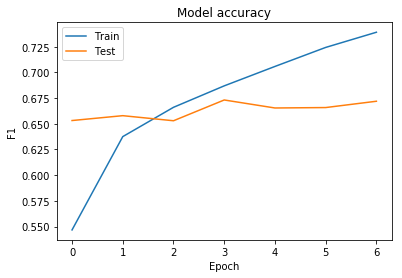

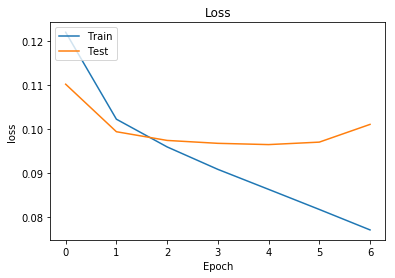

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
inp = Input(shape=(max_len,))
x = Embedding(input_dim=n_words,output_dim=emb_size, weights=[emb_matrix])(inp)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x =  Bidirectional(CuDNNGRU(128,return_sequences=True))(x)
x = Conv1D(50,10,activation='relu')(x)
x = GlobalMaxPool1D()(x)
#x = Conv1D(None,20,3,activation='relu')(x)
#x = GlobalMaxPool1D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
        #X = BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                               #beta_initializer='zeros', gamma_initializer='ones', 
                               #moving_mean_initializer='zeros', 
                               #moving_variance_initializer='ones',
                               #beta_regularizer=None, gamma_regularizer=None, 
                               #beta_constraint=None, gamma_constraint=None)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp,output=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 65)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 65, 300)           24000000  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 65, 256)           440320    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 65, 256)           296448    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 50)            128050    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               6528      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [18]:
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)

adamax= Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['acc',f1])
history  = model.fit(q_train,y_train,batch_size=1500,epochs=7,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/7
1175509/1175509 [==============================] - 210s 179us/step - loss: 0.1203 - acc: 0.9527 - f1: 0.5552 - val_loss: 0.1025 - val_acc: 0.9587 - val_f1: 0.5952

Epoch 00001: val_f1 improved from -inf to 0.59515, saving model to ./lstm_glove_emb.hdf5
Epoch 2/7
1175509/1175509 [==============================] - 217s 185us/step - loss: 0.1021 - acc: 0.9594 - f1: 0.6426 - val_loss: 0.1016 - val_acc: 0.9574 - val_f1: 0.6680

Epoch 00002: val_f1 improved from 0.59515 to 0.66801, saving model to ./lstm_glove_emb.hdf5
Epoch 3/7
1175509/1175509 [==============================] - 218s 186us/step - loss: 0.0954 - acc: 0.9618 - f1: 0.6699 - val_loss: 0.0975 - val_acc: 0.9611 - val_f1: 0.6564

Epoch 00003: val_f1 did not improve from 0.66801
Epoch 4/7
1175509/1175509 [==============================] - 219s 186us/step - loss: 0.0900 - acc: 0.9636 - f1: 0.690

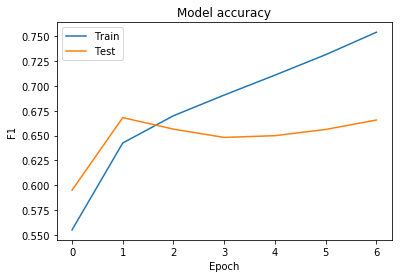

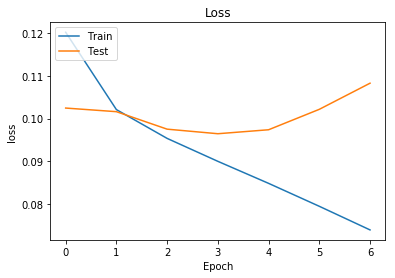

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()